# 09-More Derivatives
Non-steady state scenarios occur all around us: heating up your cold hands, warming up your food, filling your washing machine, among a myriad of other examples. There's also many non-steady state scenarios in chemical engineering: filling a tank, heating up a reactor, cooling down a reactor, etc. In this lecture, we will get more practice setting up the problem and estimating a solution.

You should further understand at the end of this discussion that if you have an expression for the derivative, you can integrate that numerically to determine the system parameters as a function of time. 

## First Example: Predators and Prey
We know that predators and prey are related. If there are more prey, there will be more predators. If there are more predators, there will be less prey. This is a classic example of a coupled system. We can write a differential equation for the number of prey and predators as:

$$
\begin{align}
\frac{dP}{dt} &= aP - bPC \\
\frac{dC}{dt} &= -cC + bPC
\end{align}
$$

where $P$ is the number of prey, $C$ is the number of predators, $a$ is the growth rate of prey, $b$ is a coupling parameter, and $c$ is the death rate of predators.

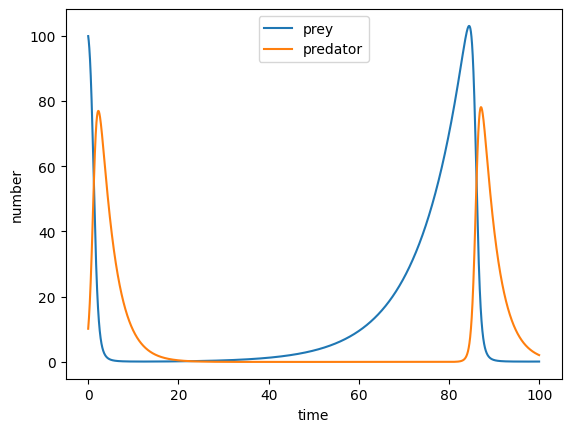

In [1]:
#this calculates the number of predators and prey in a given time interval
#and plots the results

import numpy as np
import matplotlib.pyplot as plt

#initial conditions
prey = 100
predator = 10
a = 0.1
b = 0.02
c = 0.3
t = 0
dt = 0.01
tmax = 100

#arrays to store the results
prey_array = np.zeros(int(tmax/dt))
predator_array = np.zeros(int(tmax/dt))
time_array = np.zeros(int(tmax/dt))

#loop over time
for i in range(int(tmax/dt)):
    #calculate the derivatives
    dprey = a*prey - b*prey*predator
    dpredator = -c*predator + b*prey*predator
    #update the variables
    prey += dprey*dt
    predator += dpredator*dt
    #store the results
    prey_array[i] = prey
    predator_array[i] = predator
    time_array[i] = t
    t += dt

#plot the results
plt.plot(time_array,prey_array,label='prey')
plt.plot(time_array,predator_array,label='predator')
plt.xlabel('time')
plt.ylabel('number')
plt.legend()
plt.show()

Do you see that oscillatory pattern between predators and prey in nature?

## Second Example: Solving the Lorenz Equations
The Lorenz equations are a set of three coupled, non-linear differential equations. They are used to model convection in the atmosphere and were developed by Edward Lorenz in 1963. Below is an example implementation of one solution to the Lorenz equations which are:

$$
\begin{align}
\frac{dx}{dt} &= \sigma(y-x) \\
\frac{dy}{dt} &= x(\rho-z)-y \\
\frac{dz}{dt} &= xy-\beta z
\end{align}
$$

where $\sigma$, $\rho$, and $\beta$ are constants and are proportional to the Prandtl number, Rayleigh number, and other dimensional specific relations. $x$ is proportional to the convection rate, $y$ the horizontal temperature variation, and $z$ the vertical temperature variation.

In [2]:
import numpy as np
sigma=10; rho=28; beta=8/3

#function to calculate the derivatives
def lorenz(x, y, z):
    dx = -sigma * x + rho * y
    dy = x * sigma - y - x*z
    dz = x*y - beta * z
    return dx, dy, dz

x0, y0, z0 = 10, 10, 10
dt = 0.01
t = np.arange(0, 10, dt)

#arrays to store the results
x, y, z = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)
x[0], y[0], z[0] = x0, y0, z0

for i in range(1, len(t)):
    dx, dy, dz = lorenz(x[i-1], y[i-1], z[i-1])
    x[i] = x[i-1] + dx*dt
    y[i] = y[i-1] + dy*dt
    z[i] = z[i-1] + dz*dt

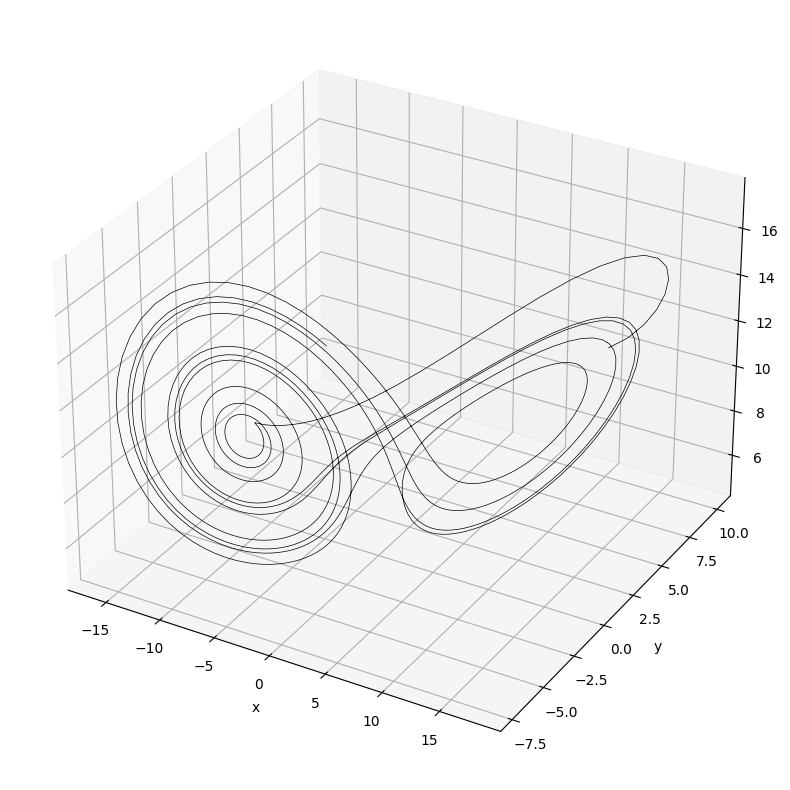

In [3]:
#now plot the results
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, lw=0.5, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Third Example: Carbon Dioxide Concentration
Carbon dioxide ($CO_2$) is produced by decaying organic matter. $CO_2$ is consumed by photosynthesis processes. Below is a photo of a sealed terrarium. 

If there are no plants in the terrarium, the $CO_2$ concentration will increase over time. One estimate is it will increase at a constant rate according to the following differential equation:

$$
\frac{dC_{CO_2}}{dt} = k
$$

where $C_{CO_2}$ is the concentration of $CO_2$ in the terrarium (ppm) and $k$ is the rate constant (1/time unit). This is a zero-order differential equation. The rate constant is proportion to the amount of soil decaying in the terrarium.

<img src='https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/terrarium.jpg?raw=true' size='200'>

Given the above differential equation: $dC_{CO_2}/dt = k$, we can integrate both sides to obtain the concentration as a function of time easily by doing the integration analytically to yield:

$$
\begin{align}
\int_{C_0}^{C_{CO_2}} dC_{CO_2} &= \int_0^t k dt \\
C_{CO_2} &= kt + C_0
\end{align}
$$

where $C_0$ is the initial concentration of $CO_2$ in the terrarium.

In [4]:
import numpy as np
time_min = np.arange(0, 400, 1)
lin_co2 = 50*time_min + 2000 #initial estimate with k and CO2 at 2000 ppm

Now we'll compare that linearly increasing predicted rate to a real scenario of carbon dioxide concentration inside a small terrarium. The atmosphere of the terrarium is first blown out with air and then it is completely closed with no plants present. Data was collected with a Bluetooth CO2 SCD30 monitor and an ESP32 microcontroller. 

In [5]:
#import needed packages
import pandas as pd
#read in the data
df = pd.read_csv('supportfiles/co2concterr.txt', sep='\t', header=9)


In [6]:
df.tail()

,Epoch_UTC,Local_Date_Time,T,RH,CO₂,DP,AH,HI,MR
61459,1.687909e+09,2023-06-27T17:42:19.779569,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61460,1.687909e+09,2023-06-27T17:42:19.861700,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61461,1.687909e+09,2023-06-27T17:42:19.865171,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61462,1.687909e+09,2023-06-27T17:42:19.943573,27.572,90.44,15974.0,25.864,23.97,32.807,21.402
61463,1.687909e+09,2023-06-27T17:42:19.947163,27.572,90.44,15974.0,25.864,23.97,32.807,21.402


In [7]:
#add an extra column to the dataframe that is the seconds from the start of the data from the 
# Epoch_UTC column
df['min'] = df.index*10 #min
#now reference from the start of the data
df['min'] = df['min'] - df['min'].iloc[-594]

In [8]:
df.iloc[-594]

Epoch_UTC                        1687880366.8
Local_Date_Time    2023-06-27T09:39:26.827185
T                                      25.801
RH                                      92.05
CO₂                                    2627.0
DP                                      24.41
AH                                     22.113
HI                                      26.84
MR                                     19.572
min                                         0
Name: 60870, dtype: object

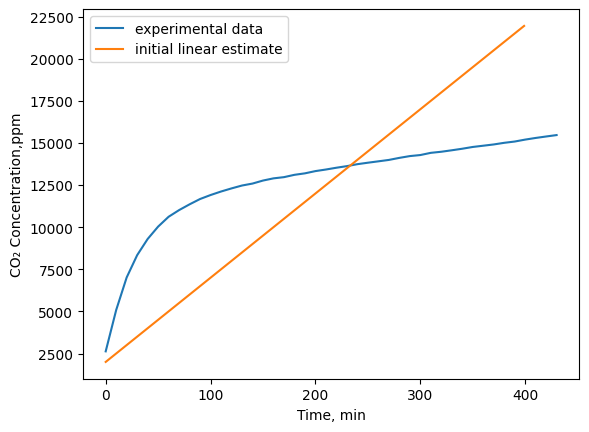

In [9]:
#plot the last custom amount of rows in the dataframe for the CO2 column
import matplotlib.pyplot as plt
plt.plot(df['min'].iloc[-594:-550],df['CO₂'].iloc[-594:-550], label='experimental data')
plt.plot(time_min,lin_co2, label='initial linear estimate')
plt.xlabel('Time, min'), plt.ylabel('CO₂ Concentration,ppm')
plt.legend(); plt.show()

As can be seen above, our initial linear estimate isn't very accurate. It appears that the production rate of CO2 is is initially at a constant rate and then at a certain concentration, it changes to a different rate. Perhaps a more accurate model would be:

$$
\frac{dC_{CO_2}}{dt} = b - a\cdot tanh((t-c)/d)
$$

This is a switching function with the hyperbolic tangent. The parameters can be adjusted such that the rate is initially at one value, then it switches to another value. We can integrate this analytically with sympy to obtain:

In [10]:
#integrate the below function symbolically with sympy
import sympy as sym
sym.init_printing(use_unicode=True) #for pretty printing

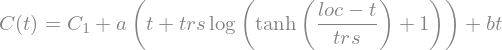

In [11]:
C = sym.Function('C')
t = sym.symbols('t')
trs, loc, a, b = sym.symbols('trs, loc, a, b')
sym.dsolve(sym.Eq(C(t).diff(t), b - a*sym.tanh((t-loc)/trs)), C(t))

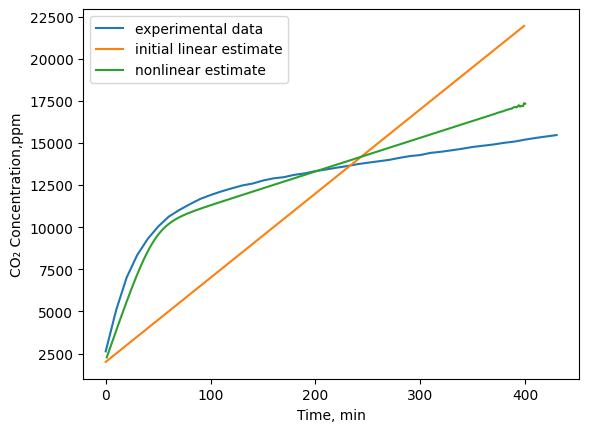

In [12]:
loc = 45
trs = 20
a = 80
b = 100
C1 = 1000

time = np.linspace(1,400,400)
Con = C1 + a*(time + trs*np.log(np.tanh((loc-time)/trs)+1))+b*time

#plot the values
plt.plot(df['min'].iloc[-594:-550],df['CO₂'].iloc[-594:-550], label='experimental data')
plt.plot(time_min,lin_co2, label='initial linear estimate')
plt.plot(time,Con,label='nonlinear estimate')
plt.legend(); plt.xlabel('Time, min'), plt.ylabel('CO₂ Concentration,ppm')
plt.show()

The above plot shows that the non-linear estimate (with parameters that were manually adjusted to better fit the data) is close to the actual data. Instead of manually adjusting the parameters, how could we estimate the parameters automatically? We could use a least squares approach to estimate the parameters. We'll discuss that in the next lecture.